In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from Ising import Lattice
from spec_heat import C

In [3]:
def M_exp(T, T_c, a):
    return a * (np.abs(T_c - T) ** (1/8)) * (T < T_c)

def N_scaling(N, T_inf, nu, a):
    return T_inf + a * N ** nu

In [25]:
K = 100
n = 300
N_steps = 7
T_l, T_h = 2.13, 2.4
T_steps = 30
Ns = np.append(np.round(np.geomspace(10, 50, N_steps)) * 2, 150)
Ts = np.linspace(T_l, T_h, T_steps)

Ms_N, Ms_err_N = [], []
for N in Ns:
    l = Lattice(int(N), d=2, K=K)
    stats, errs = l.crit_data(Ts, n=n, t0=200)
    Ms_N.append(stats[0]), Ms_err_N.append(errs[0])
    print(f'{N = }')

np.savez('data/finite_size2.npz', Ms_N=Ms_N, Ms_err_N=Ms_err_N)

N = 20.0
N = 26.0
N = 34.0
N = 44.0
N = 58.0
N = 76.0
N = 100.0
N = 150.0


In [33]:
K = 50
n = 500
N_steps = 8
T_l, T_h = 2.1, 2.45
T_steps = 35
Ns = np.append(np.round(np.geomspace(5, 50, N_steps)) * 2, 150)[1:]
Ts = np.linspace(T_l, T_h, T_steps)

Ms_N = np.load('data/finite_size.npz')['Ms_N'][1:]
Ms_err_N = np.load('data/finite_size.npz')['Ms_err_N'][1:]

2.364685076302113
2.3354760319385166
2.322178412956192
2.309276922185189
2.297684912421228
2.288321001038867
2.286044735972727
2.2786919913768258
T_inf = 2.2686573696810783 +/- 0.003489427543253084
nu = 1.0964925951695081 +/- 0.09602709559503496
a = 1.0558462901580306 +/- 0.19797969485689954


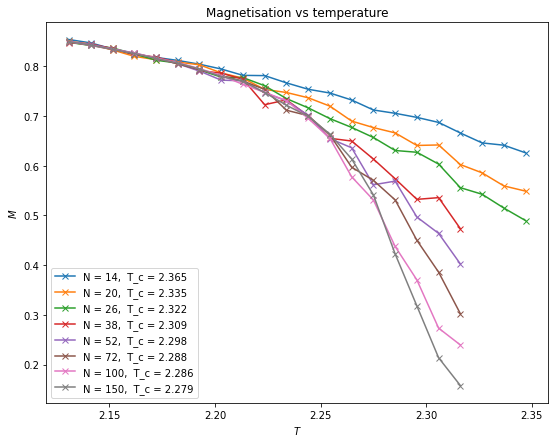

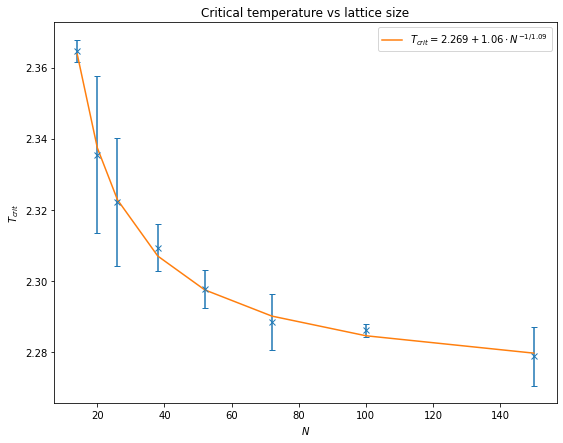

In [47]:
s1 = slice(3, -10)
s2 = slice(3, -13)
s3 = slice(3, -13)
slices = [s1 for _ in range(3)] + [s2 for _ in range(3)] + [s3 for _ in range(2)]

fig, ax = plt.subplots()
bound = ([2.15, 0.3], [2.5, 2])
Ts_c = []
T_c_errs = []
for Ms, M_errs, s in zip(Ms_N, Ms_err_N, slices):
    Ms = Ms[s]
    M_errs = M_errs[s]
    T_range = Ts[s]
    [T_c, a], fit_err = curve_fit(M_exp, T_range, Ms, bounds=bound)
    Ts_c.append(T_c)
    T_c_errs.append(np.sqrt(fit_err[0,0]))
    print(T_c)
    ax.plot(T_range, Ms, marker='x')


bound_scal = ([2.2, -3, 0], [2.4, 0, 3])
[T_inf, alpha, a], errs = curve_fit(N_scaling, Ns, Ts_c, bounds=bound_scal)

print("T_inf = " + str(T_inf) + " +/- " + str(np.sqrt(errs[0,0])))
print("nu = " + str(-1/alpha) + " +/- " + str(np.sqrt(errs[1,1])/alpha**2))
print("a = " + str(a) + " +/- " + str(np.sqrt(errs[2,2])))


ax.set_title("Magnetisation vs temperature")
ax.set_xlabel("$T$")
ax.set_ylabel("$M$")
ax.legend(["N = {:.0f},  ".format(N) + "T_c = {:.3f}".format(T) for N, T in zip(Ns, Ts_c)])
fig.set_size_inches(9, 7)
fig.savefig(r"pics/finite_size_M.png", format="png", dpi=1200, bbox_inches='tight')


fig2, ax2 = plt.subplots()
Ts_c = np.array(Ts_c)
T_c_errs = np.array(T_c_errs)
ax2.errorbar(Ns, Ts_c, T_c_errs, capsize=3, fmt='x')
ax2.plot(Ns, N_scaling(Ns, T_inf, alpha, a))

ax2.set_title("Critical temperature vs lattice size")
ax2.set_xlabel("$N$")
ax2.set_ylabel("$T_{crit}$")

fig2.set_size_inches(9, 7)
ax2.legend(["$T_{crit} = 2.269 + 1.06\cdot N^{-1/1.09}$"])
fig2.savefig(r"pics/finite_size_T.png", format="png", dpi=1200, bbox_inches='tight')